In [78]:
import numpy as np
import random 

dati_1 = np.random.normal(loc = 1200, scale = 900 , size = 76)
dati_2 = np.random.normal(loc = 1000, scale = 700 , size = 76)
dati_3 = np.random.normal(loc = 800, scale = 500 , size = 76)
dati_4 = np.random.normal(loc = 600, scale = 300 , size = 77)
dati_finali = np.concatenate((dati_1, dati_2, dati_3, dati_4))
dati_finali[dati_finali < 0] = 0
dati_finali = dati_finali.astype(int)
patologie = ['testa','cuore','ossa']
list_patologie = random.choices(patologie, k= 305)
dati_finali

array([ 894,    0, 1646, 1221, 1241,    0, 1298, 1418, 1386, 2788,  958,
       2636,  696, 1786, 1438,  813,    0, 2105,  850, 1215, 1852, 1689,
        309, 1303,  453, 1279, 1245,  283, 2773,  531, 1522, 2355, 1043,
        561,  924, 1821,    0,  568, 2150,    0, 1376,  354, 1961,  947,
       1697, 2524, 1071, 2766, 2147, 2025,  753, 1645,  428, 2054, 2816,
        403, 1720, 1464,   37,  247, 1464, 2632,  567,    0,   70, 1225,
       1344, 1545,  558, 2524, 2588,  748,  395, 1799, 1707,    0,  459,
       2287, 2878,    0, 1077,    0,  964, 1487, 1297, 1487,  732,  541,
        778,  489,  133, 1497,  354,  701, 1202, 2099,  379, 1613,   99,
       1062,  982, 1548, 1203,  552, 1792, 1467, 1724,  432, 1950, 1240,
       2203, 1583, 1538,  960, 1009, 2183, 1831, 1969,    0,  893,  886,
        923, 1335, 1943, 1036, 1600,    0, 1744,    0, 1313, 2324, 2146,
       1463, 1346, 2344, 1558, 1618, 1236,  903,  866, 1061, 1971,  863,
       1746,  804,  423,    0, 1017,    0, 1534, 11

In [79]:
giorni_disponibili = list(range(1, 32))

giorni_mese = {
    '01': 26, 
    '02': 24,  
    '03': 26,  
    '04': 26,  
    '05': 26,  
    '06': 25,  
    '07': 25,  
    '08': 25,  
    '09': 25,  
    '10': 26, 
    '11': 25, 
    '12': 26  
}

list_index = []
for mese, num_giorni in giorni_mese.items():
    giorni_selezionati = random.sample(list(range(1,32)) , num_giorni)
    giorni_selezionati.sort()
    for j in giorni_selezionati:
        list_index.append(str(j)+'-'+ str(mese))

list_index



['2-01',
 '3-01',
 '4-01',
 '5-01',
 '6-01',
 '7-01',
 '8-01',
 '9-01',
 '10-01',
 '11-01',
 '12-01',
 '13-01',
 '15-01',
 '17-01',
 '18-01',
 '19-01',
 '20-01',
 '21-01',
 '23-01',
 '24-01',
 '25-01',
 '26-01',
 '27-01',
 '28-01',
 '29-01',
 '31-01',
 '1-02',
 '2-02',
 '3-02',
 '5-02',
 '6-02',
 '7-02',
 '8-02',
 '10-02',
 '11-02',
 '12-02',
 '13-02',
 '14-02',
 '15-02',
 '16-02',
 '17-02',
 '18-02',
 '19-02',
 '20-02',
 '23-02',
 '24-02',
 '26-02',
 '27-02',
 '28-02',
 '31-02',
 '1-03',
 '3-03',
 '4-03',
 '6-03',
 '7-03',
 '8-03',
 '9-03',
 '10-03',
 '11-03',
 '12-03',
 '13-03',
 '14-03',
 '15-03',
 '16-03',
 '17-03',
 '19-03',
 '20-03',
 '21-03',
 '22-03',
 '23-03',
 '25-03',
 '26-03',
 '28-03',
 '29-03',
 '30-03',
 '31-03',
 '2-04',
 '4-04',
 '5-04',
 '6-04',
 '7-04',
 '8-04',
 '9-04',
 '10-04',
 '11-04',
 '12-04',
 '13-04',
 '14-04',
 '15-04',
 '16-04',
 '17-04',
 '18-04',
 '19-04',
 '20-04',
 '21-04',
 '22-04',
 '25-04',
 '26-04',
 '27-04',
 '28-04',
 '29-04',
 '30-04',
 '1-05',


In [80]:
import pandas as pd
df = pd.DataFrame({'Visitatori': dati_finali,
                   'Patologia' : list_patologie}, index=list_index)
df


,Visitatori,Patologia
2-01,894,ossa
3-01,0,cuore
4-01,1646,ossa
5-01,1221,testa
6-01,1241,testa
...,...,...
27-12,802,testa
28-12,372,testa
29-12,0,testa
30-12,411,cuore


In [81]:
media_mese = {}
std_mese = {}

for mese in range(1, 13):  
    
    mese_str = f'{mese:02d}'  
    visitatori_mese = df[df.index.str.endswith(mese_str)]['Visitatori']
    
    media_mese[mese] = visitatori_mese.mean()
    std_mese[mese] = visitatori_mese.std()

In [82]:
df['media_mobile'] = df['Visitatori'].rolling(window=7).mean()

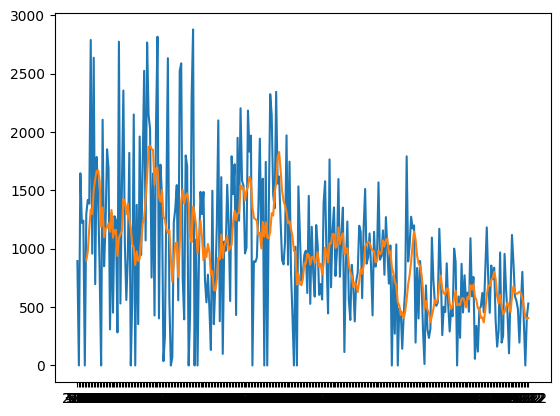

In [83]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Visitatori'], label='Visitatori')
plt.plot(df.index, df['media_mobile'])

plt.show()

In [84]:
numero_pat = df['Patologia'].value_counts()
patologia_max , num_max = numero_pat.idxmax(), numero_pat.max()
patologia_min , num_min = numero_pat.idxmin(), numero_pat.min()

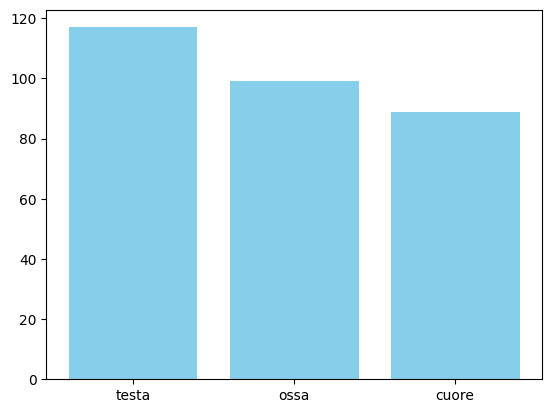

In [85]:
plt.bar(numero_pat.index, numero_pat.values, color='skyblue')
plt.show()

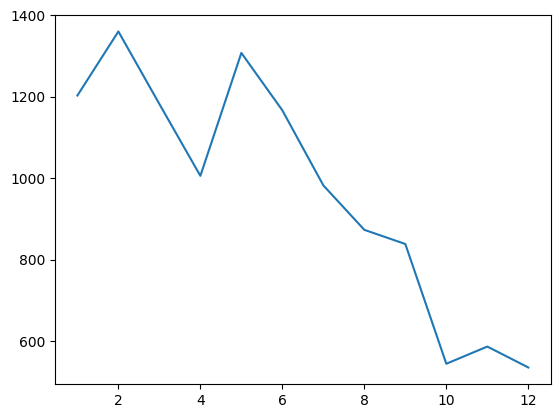

In [86]:
plt.plot(media_mese.keys() , media_mese.values(), label='Visitatori')


plt.show()